Ustawienie ziarna generatora liczb losowych

In [1]:
import numpy as np
np.random.seed(42)          #losowanie

In [2]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
import pandas as pd
X = pd.DataFrame(breast["data"])
y = pd.Series(breast["target"])
from sklearn.tree import DecisionTreeClassifier                

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

Wczytajmy sobie funkcję od cross validacji

In [4]:
from sklearn.model_selection import cross_val_score # ogólna funkcja do CV
from sklearn.model_selection import StratifiedKFold # podział na zbiory do CV     #cross validacja 

Tutaj przygotowuję sobie listę w której będę trzymał wyniki cv dla różnych wartości parametru **max_depth**

In [5]:
results = []      #lista

Sprawdzimy jakie wyniki uzyskujemy dla wartości z zakresu 1-10 dla parametru **max_depth**

Cross validacji używamy poprzez podanie jej naszego klasyfikatora, obiektów X i y oraz informacji na ile kawałków ma je podzielić

results.append(cośtam) oznacza, że do listy dodajemy na końcu element *cośtam*

In [6]:
skf = StratifiedKFold(n_splits = 5, random_state = 42)

for depth in range (1,11):
    classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    scores = cross_val_score(classifier, X_train, y_train, cv = skf)
    results.append(scores.mean())
    print("Accuracy: {} (std {})".format(scores.mean(), scores.std()))         #accuracy

Accuracy: 0.887857939162287 (std 0.023748953354234863)
Accuracy: 0.9143308382438816 (std 0.021205898200652183)
Accuracy: 0.9339183521792218 (std 0.027157286108050988)
Accuracy: 0.9382895365504063 (std 0.028675115903813286)
Accuracy: 0.9295705260922654 (std 0.020677172141758356)
Accuracy: 0.936188352710092 (std 0.0236459887174348)
Accuracy: 0.9317927483144874 (std 0.020336175521607262)
Accuracy: 0.9295705260922654 (std 0.020677172141758356)
Accuracy: 0.9273483038700432 (std 0.025018934201392944)
Accuracy: 0.9318410574932315 (std 0.012919577809734897)


In [7]:
import pandas as pd

Testowaliśmy parametr **max_depth** w zakresie 1-10, zróbmy więc sobie szereg z takim indeksem i wynikiem CV jak wartościami

In [8]:
results = pd.Series(results, index = range(1,11))       #szereg

Ze względów historycznych matplotlib domyślnie nie wyświetla wykresów. Jeśli chcemy je obejrzeć, to powinniśmy użyć poniższej *magii* która powie mu że wykresy mają być wyświetlane w tym notebooku 

In [9]:
%matplotlib inline       #wykresy

Pandas używa wspomnianego matplotlib do tworzenia wykresów. 

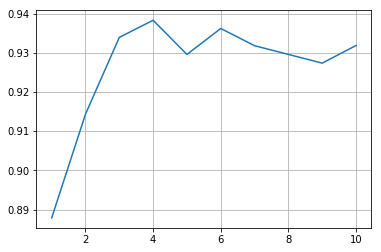

In [10]:
results.plot(grid = True)           #wykres

Nasze najwyższe accuracy jakie uzyskaliśmy w CV

In [11]:
results.max()      #max accuracy

0.9382895365504063

Powyższe accuracy odpowiada poniższej wartości parametru **max_depth**

In [12]:
results[results == results.max()]       #max depth

4    0.93829
dtype: float64

Weźmy więc tę wartość i wytrenujmy jeszcze raz nasz klasyfikator

In [13]:
best_depth = results[results == results.max()].index.item()         #best_depth

In [14]:
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = best_depth)

In [15]:
classifier.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1]:
from sklearn import tree
import graphviz 

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file = None, 
                                feature_names = breast.feature_names, 
                                class_names = breast.target_names, filled = True, 
                                rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)  
graph

In [18]:
predicted = classifier.predict(X_test)

In [19]:
wyniki = pd.DataFrame({"y_test":y_test,"y_pred":predicted}, index = y_test.index) 

In [20]:
wyniki

,y_pred,y_test
204,1,1
70,0,0
131,0,0
431,1,1
540,1,1
567,0,0
369,0,0
29,0,0
81,0,1
477,1,1


Policzmy accuracy dla zbioru test

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_true = wyniki["y_test"], y_pred = wyniki["y_pred"])      #accuracy

0.956140350877193

In [23]:
print(wyniki["y_pred"].value_counts())
print(wyniki["y_test"].value_counts())            #print wyniki

1    74
0    40
Name: y_pred, dtype: int64
1    71
0    43
Name: y_test, dtype: int64


Sprawdźmy prawdopodobieństwa dla klas

In [24]:
proba = classifier.predict_proba(X_test)           #prawdopodobienstwa
proba

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.08571429, 0.91428571],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.08571429, 0.91428571],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08571429, 0.91428571],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

A w jakiej kolejności mamy powyższe klasy?

In [25]:
classifier.classes_      #kolejno

array([0, 1])

Czyli w praktyce wystarczy nam tylko druga kolumna 

In [26]:
wyniki["proba"] = proba[:,1]     #druga kolumna

In [27]:
wyniki

,y_pred,y_test,proba
204,1,1,1.000000
70,0,0,0.000000
131,0,0,0.000000
431,1,1,1.000000
540,1,1,1.000000
567,0,0,0.000000
369,0,0,0.000000
29,0,0,0.000000
81,0,1,0.000000
477,1,1,1.000000


A które cechy są najważniejsze?

In [28]:
classifier.feature_importances_       #ważnośći

array([0.        , 0.02547529, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.61264211, 0.        , 0.        ,
       0.        , 0.00661784, 0.00945136, 0.02248308, 0.        ,
       0.        , 0.        , 0.01934258, 0.        , 0.        ,
       0.08230492, 0.0891705 , 0.10962389, 0.        , 0.        ,
       0.        , 0.        , 0.02288843, 0.        , 0.        ])

In [29]:
breast["feature_names"]     #nazwy

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')